# PDE
$\frac{\partial}{\partial t}U(t, x) -\mu\frac{\partial^2}{\partial x^2}U(t, x)=0$

In [22]:
import numpy as np

import matplotlib.pyplot as plt

from IPython.display import Image

In [23]:
from utils import IMAGE_FOLDER

In [24]:
import PDE

# Crank Nicolson

At t + $\frac{1}{2}$ and x

$\frac{1}{dt}(u_{t + 1, x} - u_{t - 1, x}) - \frac{\mu}{dx^2}(u_{t + \frac{1}{2}, x + 1} - 2u_{t + \frac{1}{2}, x} + u_{t + \frac{1}{2}, x + 1}) = 0$

Let r = $\frac{\mu dt}{dx^2}$

$u_{t + 1, x} - u_{t - 1, x} = r(u_{t + \frac{1}{2}, x + 1} - 2u_{t + \frac{1}{2}, x} + u_{t + \frac{1}{2}, x + 1})$

$u_{t + 1, x} - u_{t - 1, x} = 0.5 r(u_{t + 1, x + 1} + u_{t, x + 1} - 2u_{t + 1, x} - 2u_{t, x} + u_{t + 1, x + 1} + u_{t, x + 1})$

$\Rightarrow - r u_{t + 1, x + 1} + 2(1 + r)u_{t + 1, x} - r u_{t + 1, x - 1} = r u_{t + 1, x + 1} + 2(1 - r)u_{t + 1, x} + r u_{t + 1, x - 1}$

At limit we use boundary condition


For all x value we get the system:

$
\begin{pmatrix}
2(1 + r) & -r       & 0        & 0        & 0        & 0        \\
-r       & 2(1 + r) & -r       & 0        & 0        & 0        \\
0        & -r       & 2(1 + r) & -r       & 0        & 0        \\
0        & 0        & -r       & 2(1 + r) & -r       & 0        \\
0        & 0        & 0        & -r       & 2(1 + r) & -r       \\
0        & 0        & 0        & 0        & -r       & 2(1 + r)
\end{pmatrix} \times
\begin{pmatrix}
x_0 \\
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5
\end{pmatrix}_{t+1} =
\begin{pmatrix}
b_0 \\
b_1 \\
b_2 \\
b_3 \\
b_4 \\
b_5
\end{pmatrix}
$

With b =
$
\begin{pmatrix}
b_0 \\
b_1 \\
b_2 \\
b_3 \\
b_4 \\
b_5
\end{pmatrix} =
\begin{pmatrix}
2(1 - r) & r        & 0        & 0        & 0        & 0        \\
r        & 2(1 - r) & r        & 0        & 0        & 0        \\
0        & r        & 2(1 - r) & r        & 0        & 0        \\
0        & 0        & r        & 2(1 - r) & r        & 0        \\
0        & 0        & 0        & r        & 2(1 - r) & r        \\
0        & 0        & 0        & 0        & r        & 2(1 - r)
\end{pmatrix}\times
\begin{pmatrix}
x_0 \\
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5
\end{pmatrix}_{t}
$


Values at boundary does not matter because of boundary condition

In [25]:
# Initials conditions

mu = 0.3

x_min = 0
x_max = 4 * np.pi
dx = 0.1
x_axes = np.arange(x_min, x_max, dx)

u0 = np.sin(x_axes)

t0 = 0
dt = 0.1
T = 20

In [26]:
# Bondary conditions

def bound(u): 
    u[0] = 0
    u[-1] = 0.5
    return u

In [27]:
un = bound(u0)
states = [un]

r = mu * dt / dx ** 2
A = PDE.utils.tridiag(np.array([-r, 2 + 2 * r, -r]), len(un))
B = PDE.utils.tridiag(np.array([r, 2 - 2 * r, r]), len(un))


for t in np.arange(t0, T, dt):
    d = B.dot(un)
    un = bound(PDE.solve.thomas(A, un, d))
    states.append(un)



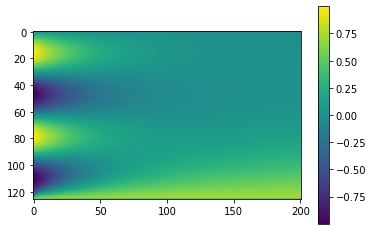

In [28]:
image_path = IMAGE_FOLDER / "heat_eq1.jpeg"
image_array = np.vstack(states).T
plt.imshow(np.clip(image_array, -1, 1))
plt.colorbar()
plt.savefig(image_path)

## 2D Numerical solution

Same as before but with the general expression of second space derivative: Laplacian operator

$$\frac{\partial}{\partial t}U(t, x) -\mu\nabla U(t, x)=0$$

